
### A Book Recommendation System which recommends the users a selection of books based on their interests.

###  import Necessary Libraries

In [1]:
!pip install --upgrade pandas

In [2]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### import data

In [3]:
books=pd.read_csv("C:\\Users\\DELL\\OneDrive\\Documents\\Books.csv",encoding='latin-1')#unicode error
users=pd.read_csv("C:\\Users\\DELL\\Downloads\\Users.csv",encoding='latin-1')
ratings=pd.read_csv("C:\\Users\DELL\\Downloads\\Ratings.csv",encoding='latin-1')

### Data understanding

In [4]:
books.head(2)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [5]:
users.head(2)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [6]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0


In [7]:
print("BOOKS_DATA:",books.shape)
print("USERS_DATA:",users.shape)
print("RATINGS_DATA:",ratings.shape)

BOOKS_DATA: (271360, 8)
USERS_DATA: (278858, 3)
RATINGS_DATA: (1149780, 3)


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book-Rating  1149772 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 26.3+ MB


In [11]:
books.isna().sum()#used to detect missing values and to count the no of NANS

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    8
dtype: int64

###  DATA CLEANING  & DATA EXPLORATION

#### 1.BOOKS_DATA

### We will drop the columns that primarily don't seem important for the book recommendation.

In [14]:
 
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [15]:
#books= books.drop('Image-URL-S', axis=1)
#books= books.drop('Image-URL-M', axis=1)
#books= books.drop('Image-URL-L', axis=1)
#books.head()

In [16]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [17]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [18]:
# Renamimng the columns

dict={'Book-Title':'title','Book-Author':'bookauthor','Year-Of-Publication':'yearofpublication','Publisher':'publisher'}
books.rename(columns=dict,inplace=True)

In [19]:
books.dropna(inplace=True)

In [20]:
books['yearofpublication'].shape

(271353,)

In [21]:
books['yearofpublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [22]:
# fxing the error's year of publication column


books.loc[(books['yearofpublication']=='DK Publishing Inc') | (books['yearofpublication']=='Gallimard')]



,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [23]:
#dropping the rows with errors as they are very few in number
books.drop(books[books['yearofpublication']=='DK Publishing Inc'].index,inplace=True)
books.drop(books[books['yearofpublication']=='Gallimard'].index,inplace=True)
books

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


There are some incorrect entries in yearOfPublication. It looks like publisher names ‘DK Publishing Inc’ and ‘Gallimard’ have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file. Also, some of the values are strings and same years have been entered as numbers at some places. We will make necessary correction for these rows and set the data type for yearOfPublication as int.

In [24]:
#changing the publication year to int type before feeding it to the models
books['yearofpublication'] = books['yearofpublication'].astype('int')
books

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [25]:
print(sorted(books['yearofpublication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


### we are having some publications years as 0 ideally we were not supposed to have  years like these. we are not going to drop here as we may loose some valid information. so, replace these years by mean of same column

In [26]:
#replacing the yearofpublication with 0 input with nan values

books.loc[(books['yearofpublication']==0)]=np.nan
#replacing the nan values in the publication year with mean of the same column

books['yearofpublication'].fillna((books['yearofpublication'].mean()), inplace=True)



In [27]:
#converting to integer type
books['yearofpublication'] = books['yearofpublication'].astype('int') 

In [28]:
books['yearofpublication'].value_counts()[0:10]

yearofpublication
2002    17626
1999    17430
2001    17358
2000    17232
1998    15766
1993    15220
1997    14890
2003    14358
1996    14030
1995    13545
Name: count, dtype: int64

In [29]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               266735 non-null  object
 1   title              266735 non-null  object
 2   bookauthor         266735 non-null  object
 3   yearofpublication  271353 non-null  int32 
 4   publisher          266735 non-null  object
 5   Image-URL-S        266735 non-null  object
 6   Image-URL-M        266735 non-null  object
 7   Image-URL-L        266735 non-null  object
dtypes: int32(1), object(7)
memory usage: 17.6+ MB


In [30]:
books.head(4)

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [31]:
## Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

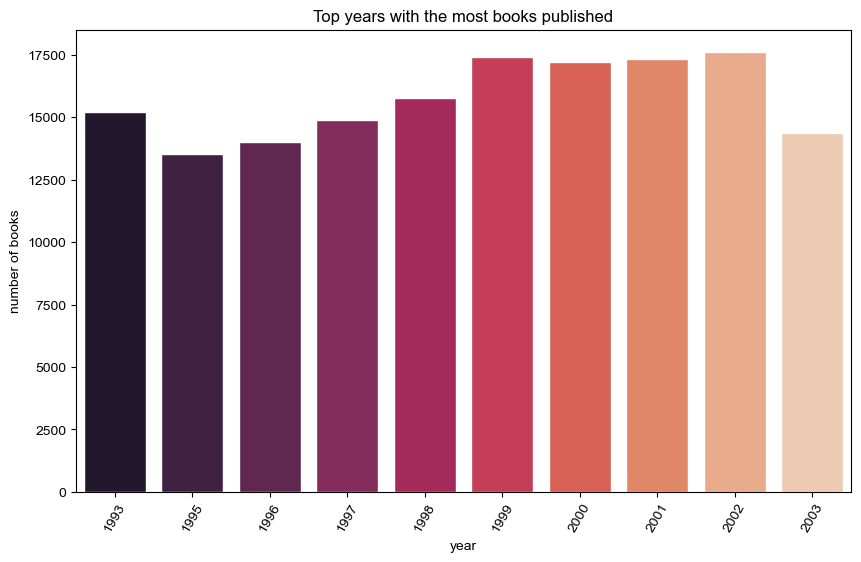

In [32]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['yearofpublication'].value_counts()[:10].index,y = books['yearofpublication'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top years with the most books published',xlabel = 'year',ylabel = 'number of books')
plt.xticks(rotation = 60)
plt.show()

### Year 2000 has seen the most number of books being published around 17500 books. The ten year period stretching from 1993 to 2003 has seen a good number of book publications.

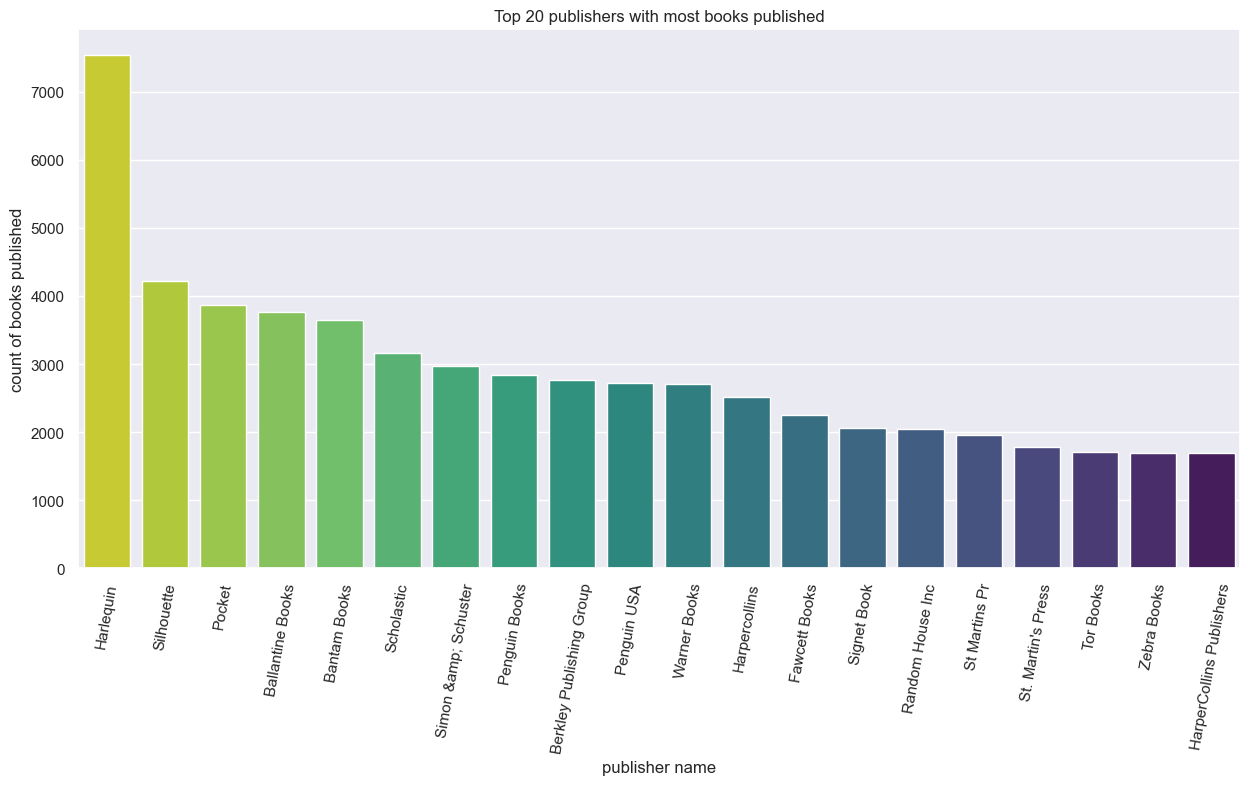

In [33]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publisher'].value_counts()[:20].index,y = books['publisher'].value_counts()[:20].values,
            palette = 'viridis_r').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

#### Harlequin can be seen as the publication house that has published the most number of books almost close to 7600 books, followed by Silhouette then Pocket and others in the sequence.

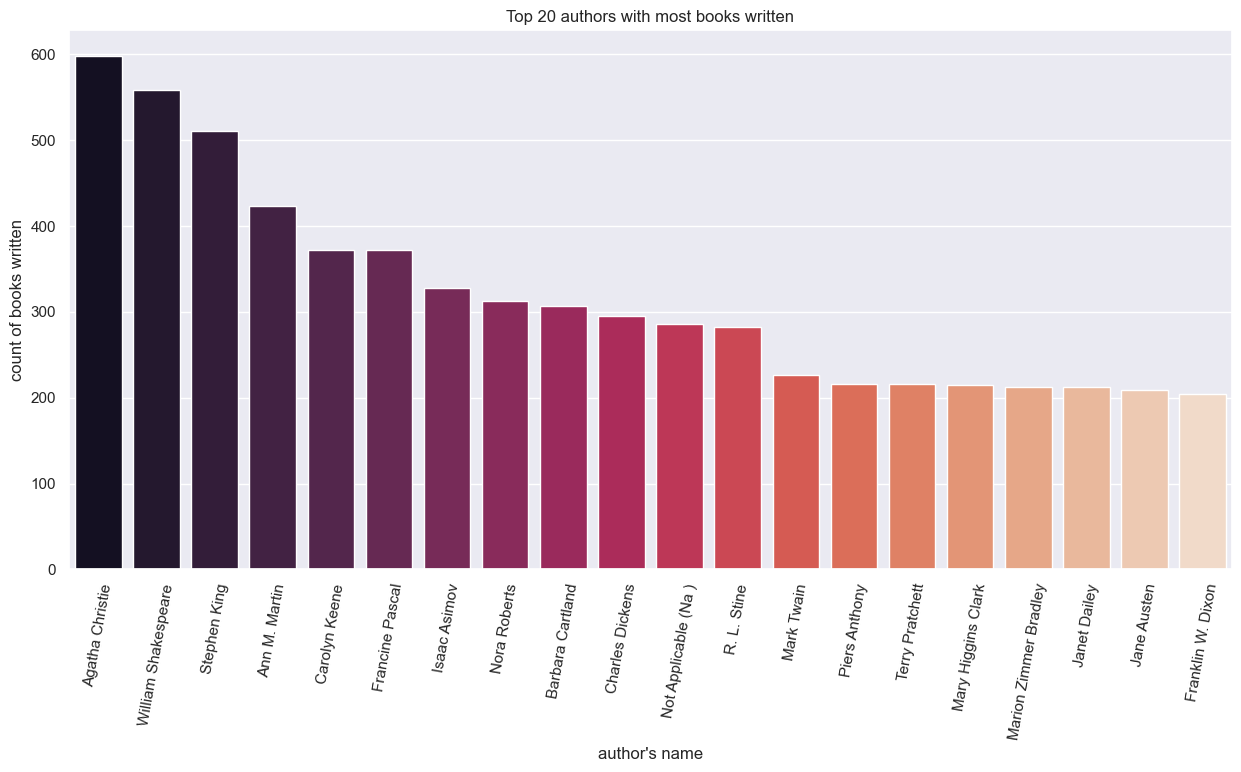

In [34]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['bookauthor'].value_counts()[:20].index,y = books['bookauthor'].value_counts()[:20].values,
            palette = 'rocket').set(title = 'Top 20 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()

### Agatha Christie has authored the most books in our dataset with 600 books. William Shakespeare, Stephen Hawking and Ann M. Martin are also some of the authors who have written 400 - 500 books

### USERSDATA

In [35]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [36]:
dict = {'User-ID': 'userID',
        'Age':'age'}

users.rename(columns=dict,inplace=True)

In [37]:
users.head(1)

,userID,Location,age
0,1,"nyc, new york, usa",NaN


In [38]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [39]:
users.isna().sum()

userID           0
Location         0
age         110762
dtype: int64

In [40]:
print(sorted(users['age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

#### As can we see from the values t people who are 0 years old and also we have people who are 244 years old which is for sure an error so we will keep the age group only from 5 years old to 85 years old and for the rest we will replace them with mean of the age.

In [41]:
#replacing the less than 5 and more than 85 values with mean of the age   
users.loc[(users['age'] < 5) | (users['age'] > 85),'age'] = np.nan
users['age'].fillna((users['age'].mean()), inplace=True)

print(sorted(users['age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.71685995610511, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0]


In [42]:
#converting the age to integer type 
users['age'] = users['age'].astype('int')
users['age']

0         34
1         18
2         34
3         17
4         34
          ..
278853    34
278854    50
278855    34
278856    34
278857    34
Name: age, Length: 278858, dtype: int32

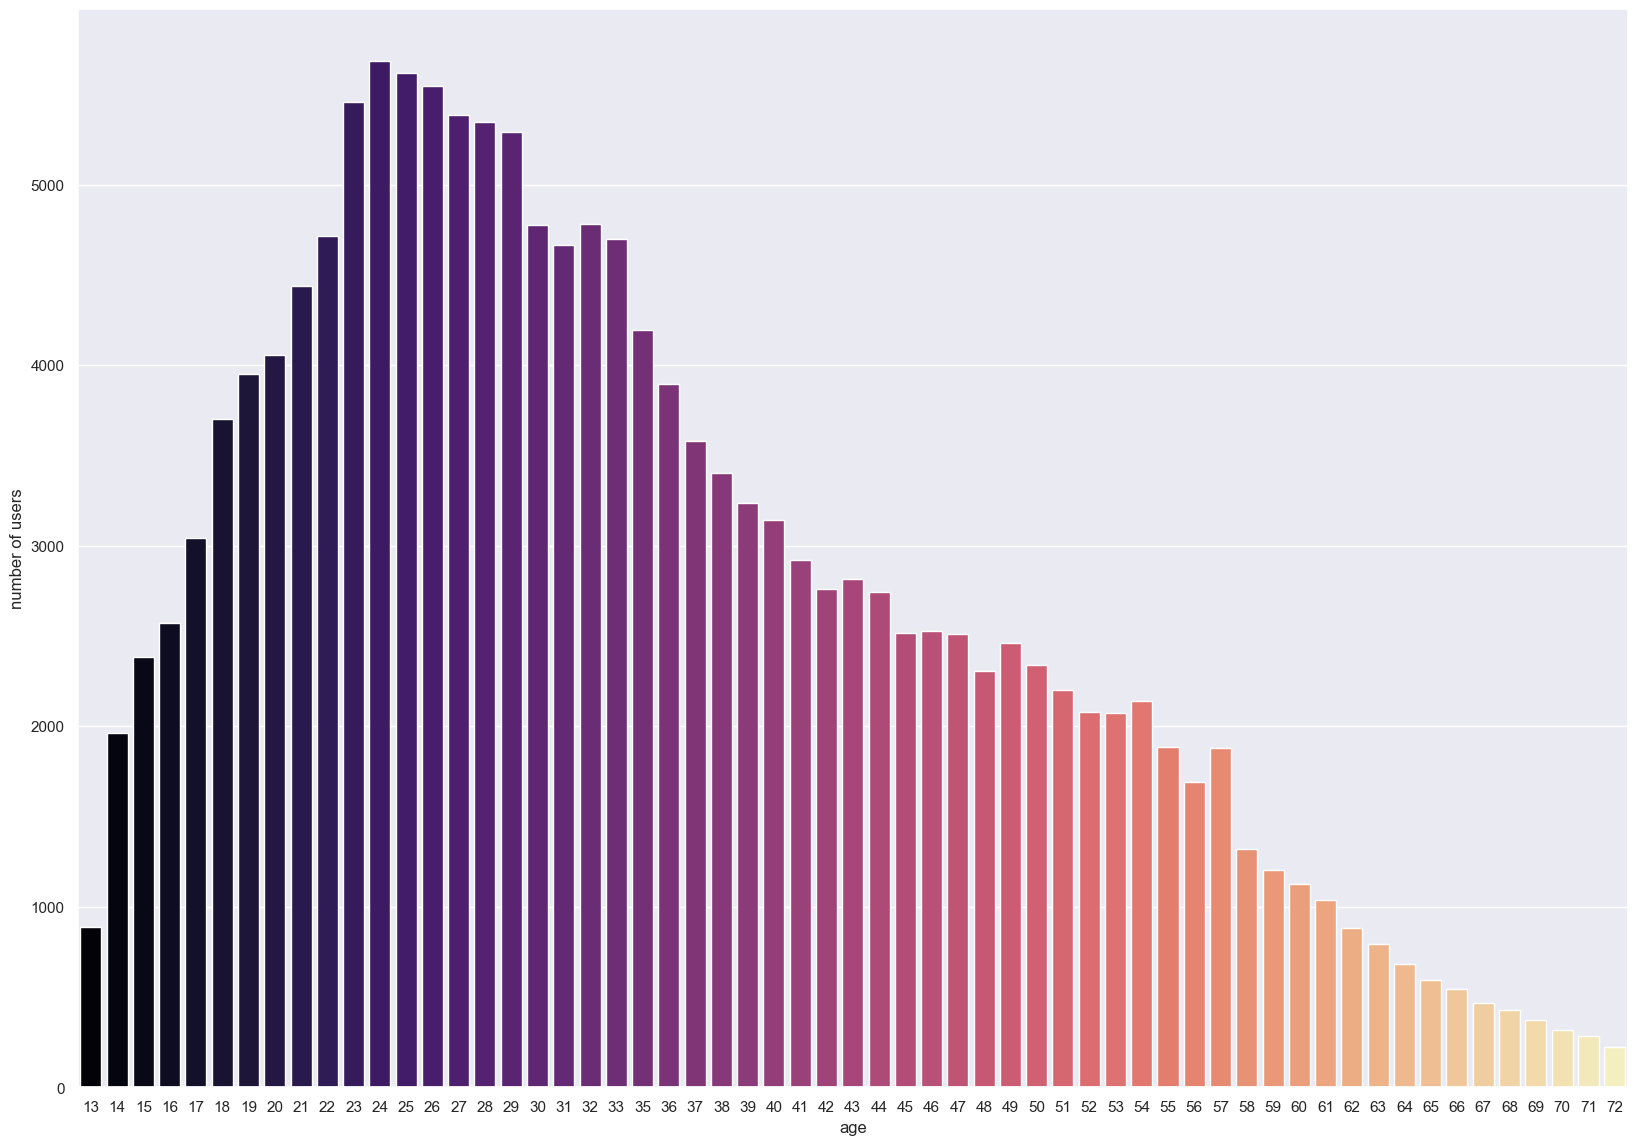

In [43]:
plt.subplots(figsize=(20,14))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = users['age'].value_counts()[1:60].index,y = users['age'].value_counts()[1:60].values,
            palette = 'magma').set(xlabel = "age",ylabel = 'number of users')
plt.show()

#### The most number of users in our dataset are from the age group 20 years to 40years old.

### RATINGS

In [44]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


In [45]:
dict = {'User-ID': 'userID',
        'Book-Rating':'book_rating'}

ratings.rename(columns=dict,inplace=True)

In [46]:
ratings.head()

,userID,ISBN,book_rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [47]:
ratings['book_rating'].unique()

array([ 0.,  5.,  3.,  6.,  8.,  7., 10.,  9.,  4.,  1.,  2., nan])

In [48]:
ratings['userID'].value_counts()

userID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [49]:
ratings['userID'].unique().shape

(105283,)

In [50]:
ratings_with_books=ratings.merge(books,on="ISBN")
ratings_with_books

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1029892,276704,0876044011,0.0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1029893,276704,1563526298,9.0,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1029894,276706,0679447156,0.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1029895,276709,0515107662,10.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [51]:
ratings_with_books.shape

(1029897, 10)

In [52]:
books.head()

,ISBN,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [53]:
ratings.head(2)

,userID,ISBN,book_rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0


In [54]:
ratings_with_books.head()

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [55]:
num_rating_df = ratings_with_books.groupby('title')['book_rating'].count().reset_index()
#num_rating_df=ratings_with_books.groupby("title").count()["book_rating"].reset_index()

num_rating_df['book_rating'] = pd.to_numeric(num_rating_df['book_rating'], errors='coerce')

num_rating_df.rename(columns={'book_rating':'num-ratings'},inplace=True)
num_rating_df.head()

,title,num-ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [56]:
#avg_rating_df=ratings_with_books.groupby("title").mean()["book_rating"].reset_index()
avg_rating_df = ratings_with_books.groupby('title').agg({'book_rating': 'mean'}).reset_index()

#avg_rating_df.rename(columns={'num-ratings':'avg-ratings'},inplace=True)

avg_rating_df

,title,book_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
237372,Ã?Â?lpiraten.,0.000000
237373,Ã?Â?rger mit Produkt X. Roman.,5.250000
237374,Ã?Â?sterlich leben.,7.000000
237375,Ã?Â?stlich der Berge.,2.666667


In [57]:
avg_rating_df.rename(columns={'book_rating':'avg-ratings'},inplace=True)


In [58]:
popular_df=num_rating_df.merge(avg_rating_df,on='title')
popular_df

,title,num-ratings,avg-ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
237372,Ã?Â?lpiraten.,2,0.000000
237373,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
237374,Ã?Â?sterlich leben.,1,7.000000
237375,Ã?Â?stlich der Berge.,3,2.666667


In [59]:
popular_df.shape

(237377, 3)

In [60]:
popular_df[popular_df['num-ratings']>=250]

,title,num-ratings,avg-ratings
745,1984,266,4.473684
798,1st to Die: A Novel,509,3.575639
1023,2nd Chance,356,3.269663
1729,A Bend in the Road,346,3.364162
2249,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
230267,White Oleander : A Novel,387,3.506460
230268,White Oleander : A Novel (Oprah's Book Club),356,3.772472
231143,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
231351,Wild Animus,2502,1.019584


In [61]:
popular_df=popular_df[popular_df['num-ratings']>=250].sort_values('avg-ratings',ascending=False)
popular_df.head()

,title,num-ratings,avg-ratings
79002,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
78990,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
78994,Harry Potter and the Order of the Phoenix (Boo...,680,5.529412
79009,Harry Potter and the Sorcerer's Stone (Book 1),378,5.457672
78982,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [62]:
popular_df.head(50)

,title,num-ratings,avg-ratings
79002,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
78990,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
78994,Harry Potter and the Order of the Phoenix (Boo...,680,5.529412
79009,Harry Potter and the Sorcerer's Stone (Book 1),378,5.457672
78982,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
188413,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
184191,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
79013,Harry Potter and the Sorcerer's Stone (Harry P...,1142,4.900175
208139,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
91576,Interpreter of Maladies,256,4.867188


In [63]:
popular_df

,title,num-ratings,avg-ratings
79002,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
78990,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
78994,Harry Potter and the Order of the Phoenix (Boo...,680,5.529412
79009,Harry Potter and the Sorcerer's Stone (Book 1),378,5.457672
78982,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
70487,Full Tilt (Janet Evanovich's Full Series),306,2.189542
140744,Presumed Innocent,294,2.139456
92756,Isle of Dogs,288,2.000000
27234,Breathing Lessons,394,1.951777


In [64]:
popular_df=popular_df.merge(books,on='title').drop_duplicates('title')[['title','bookauthor','num-ratings','avg-ratings','Image-URL-M']]
popular_df
#popular_df = popular_df.merge(books,on='title')

#Drop duplicates based on 'title' and select specific columns
#popular_df.drop_duplicates('title')[['bookauthor','num-ratings','avg-ratings','Image-URL-M']]
#popular_df



,title,bookauthor,num-ratings,avg-ratings,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,680,5.529412,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,378,5.457672,http://images.amazon.com/images/P/0590353403.0...
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453,http://images.amazon.com/images/P/0439064872.0...
...,...,...,...,...,...
759,Full Tilt (Janet Evanovich's Full Series),Janet Evanovich,306,2.189542,http://images.amazon.com/images/P/031298328X.0...
761,Presumed Innocent,Scott Turow,294,2.139456,http://images.amazon.com/images/P/0446359866.0...
767,Isle of Dogs,Patricia Cornwell,288,2.000000,http://images.amazon.com/images/P/0425182908.0...
773,Breathing Lessons,Anne Tyler,394,1.951777,http://images.amazon.com/images/P/042511774X.0...


In [65]:
popular_df.head(50)

,title,bookauthor,num-ratings,avg-ratings,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,680,5.529412,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,378,5.457672,http://images.amazon.com/images/P/0590353403.0...
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,281,5.007117,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,4.948370,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1142,4.900175,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,260,4.880769,http://images.amazon.com/images/P/0345339711.0...
39,Interpreter of Maladies,Jhumpa Lahiri,256,4.867188,http://images.amazon.com/images/P/039592720X.0...


TOP  BOOKS 

In [66]:
ratings_with_books.head()

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5.0,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [67]:
ratings_with_books.groupby("userID").count()['book_rating']

userID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: book_rating, Length: 90670, dtype: int64

In [68]:
x=ratings_with_books.groupby("userID").count()['book_rating']>200
u=x[x].index

In [69]:
u

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='userID', length=814)

In [70]:
ratings_with_books[ratings_with_books['userID'].isin(u)]

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
1127,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1128,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1129,277427,0026217457,0.0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1130,277427,003008685X,8.0,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1131,277427,0030615321,0.0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
...,...,...,...,...,...,...,...,...,...,...
1028145,275970,1931868123,0.0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
1028146,275970,3411086211,10.0,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
1028147,275970,3829021860,0.0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1028148,275970,4770019572,0.0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...


In [71]:
filtered_rat=ratings_with_books[ratings_with_books['userID'].isin(u)]
print(filtered_rat)


         userID        ISBN  book_rating  \
1127     277427  002542730X         10.0   
1128     277427  002542730X         10.0   
1129     277427  0026217457          0.0   
1130     277427  003008685X          8.0   
1131     277427  0030615321          0.0   
...         ...         ...          ...   
1028145  275970  1931868123          0.0   
1028146  275970  3411086211         10.0   
1028147  275970  3829021860          0.0   
1028148  275970  4770019572          0.0   
1028149  275970  9626340762          8.0   

                                                     title  \
1127     Politically Correct Bedtime Stories: Modern Ta...   
1128     Politically Correct Bedtime Stories: Modern Ta...   
1129                    Vegetarian Times Complete Cookbook   
1130                                              Pioneers   
1131      Ask for May, Settle for June (A Doonesbury book)   
...                                                    ...   
1028145  There's a Porcupine in My Ou

In [72]:
y=filtered_rat.groupby('title').count()["book_rating"]>=50
popular_books=y[y].index
popular_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=730)

In [73]:
final_rating=filtered_rat[filtered_rat["title"].isin(popular_books)]
final_rating

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
1127,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1128,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1141,277427,0060930535,0.0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1143,277427,0060934417,0.0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1146,277427,0061009059,9.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
...,...,...,...,...,...,...,...,...,...,...
1027983,275970,1400031354,0.0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1027984,275970,1400031362,0.0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1028057,275970,1573229725,0.0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1028096,275970,1586210661,9.0,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [74]:
final_rating.head()

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
1127,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1128,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1141,277427,0060930535,0.0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1143,277427,0060934417,0.0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1146,277427,0061009059,9.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...


In [75]:
final_rating=final_rating.drop_duplicates()
final_rating.head()

,userID,ISBN,book_rating,title,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
1127,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1141,277427,0060930535,0.0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1143,277427,0060934417,0.0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1146,277427,0061009059,9.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1152,277427,006440188X,0.0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...


In [76]:
book_pivot=final_rating.pivot_table(columns='userID',index='title',values='book_rating')

In [77]:
book_pivot# nan 0 ratings from user

userID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [78]:
book_pivot.shape#760 book and 888 user

(730, 813)

In [79]:
book_pivot.fillna(0,inplace=True)
book_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
from scipy.sparse import csr_matrix
#it ignore zero and it consider value only

In [81]:
book_sparse=csr_matrix(book_pivot)
book_sparse

<730x813 sparse matrix of type '<class 'numpy.float64'>'
	with 14530 stored elements in Compressed Sparse Row format>

In [82]:
from sklearn.neighbors import NearestNeighbors

In [83]:
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [84]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1),n_neighbors=6)
#algorithm can return both the distances to the nearest neighbors and their indices. 
 

In [85]:
suggestions

array([[237, 340, 300, 178, 359, 111]], dtype=int64)

In [86]:
distances# 6 books is recommending

array([[ 0.        , 19.67231557, 20.71231518, 21.14237451, 21.40093456,
        23.06512519]])

In [87]:
#let us print all the suggested books.

for i in range(len(suggestions)):
     print(book_pivot.index[suggestions[i]])


Index(['Harvest', 'Monster Blood (Goosebumps, No 3)', 'Lake News', 'Exclusive',
       'Night Moves (Tom Clancy's Net Force, No. 3)', 'City of Light'],
      dtype='object', name='title')


In [88]:
book_pivot.index[3]

'4 Blondes'

In [89]:
book_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=730)

In [90]:
book_name=book_pivot.index

In [91]:
len(book_pivot.columns)

813

In [92]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
     

user_sim = 1 - pairwise_distances(book_pivot.values,metric='cosine')
     

user_sim
     

array([[1.        , 0.0999137 , 0.01189468, ..., 0.11799012, 0.07158663,
        0.04205081],
       [0.0999137 , 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01189468, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.11799012, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07158663, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04205081, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [93]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

truncate = ratings_with_books.userID.unique()[:730]
   

#Set the index and column names to user ids 
user_sim_df.index = truncate
user_sim_df.columns = truncate
     

user_sim_df.iloc[0:5, 0:5]
     

,276725,276726,276727,276729,276733
276725,1.000000,0.099914,0.011895,0.0,0.052292
276726,0.099914,1.000000,0.236457,0.0,0.109538
276727,0.011895,0.236457,1.000000,0.0,0.069090
276729,0.000000,0.000000,0.000000,1.0,0.000000
276733,0.052292,0.109538,0.069090,0.0,1.000000


In [94]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276725,276726,276727,276729,276733
276725,0.000000,0.099914,0.011895,0.0,0.052292
276726,0.099914,0.000000,0.236457,0.0,0.109538
276727,0.011895,0.236457,0.000000,0.0,0.069090
276729,0.000000,0.000000,0.000000,0.0,0.000000
276733,0.052292,0.109538,0.069090,0.0,0.000000


In [95]:
#5 Similar Users
user_sim_df.idxmax(axis=1)[0:5]

276725    276872
276726    276853
276727    277457
276729    278389
276733    278431
dtype: int64

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(book_pivot)

array([[1.        , 0.0999137 , 0.01189468, ..., 0.11799012, 0.07158663,
        0.04205081],
       [0.0999137 , 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01189468, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.11799012, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07158663, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04205081, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [97]:
cosine_similarity(book_pivot).shape

(730, 730)

In [98]:
similarity_scores = cosine_similarity(book_pivot)
similarity_scores

array([[1.        , 0.0999137 , 0.01189468, ..., 0.11799012, 0.07158663,
        0.04205081],
       [0.0999137 , 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01189468, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.11799012, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07158663, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04205081, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [99]:
np.where(book_pivot.index == 'Zoya')[0][0]

728

In [100]:
np.where(book_pivot.index == '1984')[0][0]

0

In [101]:
enumerate(similarity_scores[0])

In [102]:
list(enumerate(similarity_scores[0]))

[(0, 0.9999999999999999),
 (1, 0.09991370443681998),
 (2, 0.011894676421575648),
 (3, 0.0),
 (4, 0.0522923428754616),
 (5, 0.02816207513465023),
 (6, 0.08005246987594641),
 (7, 0.11879083201654522),
 (8, 0.03177829126649559),
 (9, 0.03573297811768626),
 (10, 0.022627095695491876),
 (11, 0.06592521898256122),
 (12, 0.02030399594727408),
 (13, 0.09425025422049897),
 (14, 0.13044639995428942),
 (15, 0.07567165833998568),
 (16, 0.10866787678155022),
 (17, 0.04908258808401622),
 (18, 0.024530524976685255),
 (19, 0.11405414701564792),
 (20, 0.0),
 (21, 0.1350074016790025),
 (22, 0.07543115899286529),
 (23, 0.05992324616320607),
 (24, 0.08177969432820253),
 (25, 0.0),
 (26, 0.0),
 (27, 0.06829593609316079),
 (28, 0.13307519236960053),
 (29, 0.0740492482078533),
 (30, 0.11704760904174807),
 (31, 0.007482996232171423),
 (32, 0.01435345067390976),
 (33, 0.0),
 (34, 0.07761014992531964),
 (35, 0.0),
 (36, 0.04406341116244771),
 (37, 0.015162595382829198),
 (38, 0.09251799313259884),
 (39, 0.01776

In [103]:
sorted(list(enumerate(similarity_scores[0])), key=lambda x:x[1])

[(3, 0.0),
 (20, 0.0),
 (25, 0.0),
 (26, 0.0),
 (33, 0.0),
 (35, 0.0),
 (54, 0.0),
 (57, 0.0),
 (63, 0.0),
 (69, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (85, 0.0),
 (93, 0.0),
 (94, 0.0),
 (101, 0.0),
 (106, 0.0),
 (111, 0.0),
 (118, 0.0),
 (135, 0.0),
 (136, 0.0),
 (137, 0.0),
 (141, 0.0),
 (145, 0.0),
 (146, 0.0),
 (149, 0.0),
 (160, 0.0),
 (164, 0.0),
 (176, 0.0),
 (179, 0.0),
 (183, 0.0),
 (195, 0.0),
 (205, 0.0),
 (214, 0.0),
 (226, 0.0),
 (227, 0.0),
 (241, 0.0),
 (250, 0.0),
 (252, 0.0),
 (267, 0.0),
 (270, 0.0),
 (277, 0.0),
 (278, 0.0),
 (290, 0.0),
 (293, 0.0),
 (294, 0.0),
 (314, 0.0),
 (317, 0.0),
 (321, 0.0),
 (343, 0.0),
 (344, 0.0),
 (348, 0.0),
 (359, 0.0),
 (360, 0.0),
 (365, 0.0),
 (375, 0.0),
 (384, 0.0),
 (387, 0.0),
 (397, 0.0),
 (399, 0.0),
 (400, 0.0),
 (401, 0.0),
 (410, 0.0),
 (413, 0.0),
 (417, 0.0),
 (419, 0.0),
 (422, 0.0),
 (443, 0.0),
 (448, 0.0),
 (464, 0.0),
 (466, 0.0),
 (467, 0.0),
 (470, 0.0),
 (471, 0.0),
 (483, 0.0),
 (486, 0.0),
 (488, 0.0),
 (4

In [104]:
sorted(list(enumerate(similarity_scores[0])), key=lambda x:x[1], reverse=True) [1:6]

[(49, 0.2685185053387203),
 (563, 0.2571755349668579),
 (84, 0.23060840046543507),
 (656, 0.22985134106577823),
 (569, 0.2204467783292418)]

In [105]:
def recommend(book_name):
  #index fetch
  index = np.where(book_pivot.index == book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse=True)[1:6]

  for i in similar_items:
    print(book_pivot.index[i[0]])


In [106]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [107]:
recommend('Zoya')

Fine Things
Secrets
Kaleidoscope
Exclusive
Five Days in Paris


In [108]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Touching Evil
Middlesex: A Novel
Saving Faith
The Sweet Potato Queens' Book of Love


In [109]:
import pickle
pickle.dump(popular_df,open('popular.pkl', 'wb'))

In [110]:
def recommend(book_name):
  #index fetch
  index = np.where(book_pivot.index == book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1], reverse=True)[1:6]

  data = []
  for i in similar_items:
    item = []
    temp_df = books[books['title'] == book_pivot.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('title')['title'].values))
    item.extend(list(temp_df.drop_duplicates('title')['bookauthor'].values))
    item.extend(list(temp_df.drop_duplicates('title')['Image-URL-M'].values))

    data.append(item)

  return data


In [111]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg']]

In [112]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [113]:
pickle.dump(book_pivot, open('book_pivot.pkl', 'wb'))
pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))

In [114]:
pip show pandas

Name: pandasNote: you may need to restart the kernel to use updated packages.

Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of